In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

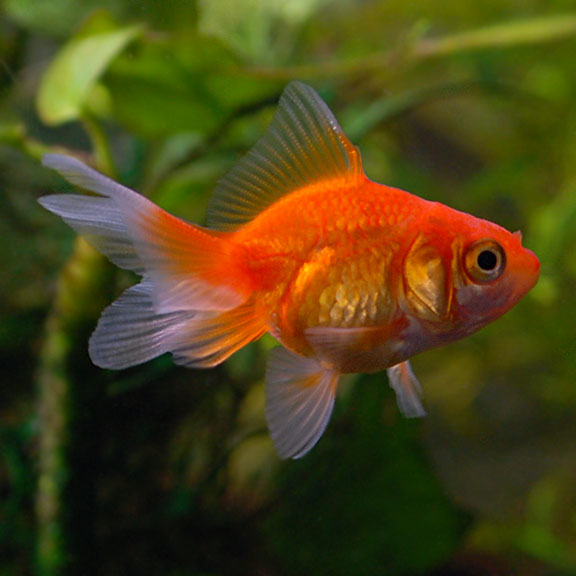

In [3]:
Image.open('goldfish.jpg')

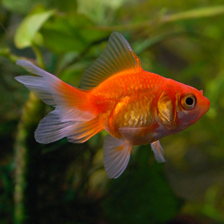

In [4]:
gold_fish=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish=np.array(gold_fish)/255.0

In [6]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [7]:
#Model expects multiple inputs.Thus we need to reshape a 3D matrix (image) to a 4D in;ut where the first dimension represents the number of inputs
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
classifier.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 2s 2s/step


array([[ 0.22101435,  2.0474896 ,  9.622563  , ..., -1.462158  ,
        -0.28146622, -0.25984925]], dtype=float32)

In [9]:
result=classifier.predict(gold_fish[np.newaxis,...])
predicted_label_index=np.argmax(result)
predicted_label_index

1/1 [==============================] - 0s 100ms/step


2

In [10]:
image_labels=[]
with open("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 38s 0us/step


In [12]:
#to convert string path to windows path
import pathlib
data_dir = pathlib.Path('datasets/flower_photos')
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

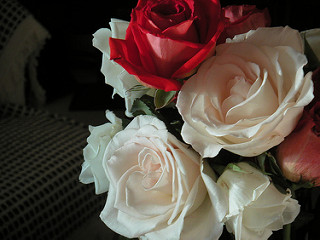

In [16]:
Image.open(str(roses[1]))

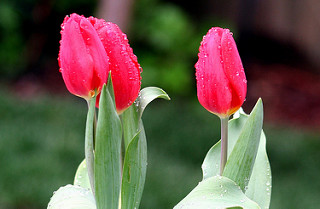

In [17]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [20]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [21]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [22]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [23]:
img.shape

(240, 179, 3)

In [24]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

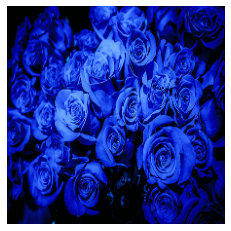

In [29]:
plt.axis('off')
plt.imshow(X[2])

In [43]:
# predicted=classifier.predict(np.array([X[0],X[2]]))
predicted=classifier.predict(np.array([X[0],X[2]]))


1/1 [==============================] - 0s 139ms/step


In [44]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [45]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 77s 802ms/step - loss: 0.7908 - acc: 0.7086
Epoch 2/5
86/86 [==============================] - 69s 805ms/step - loss: 0.3986 - acc: 0.8677
Epoch 3/5
86/86 [==============================] - 71s 823ms/step - loss: 0.3170 - acc: 0.8950
Epoch 4/5
86/86 [==============================] - 69s 807ms/step - loss: 0.2625 - acc: 0.9172
Epoch 5/5
86/86 [==============================] - 68s 794ms/step - loss: 0.2251 - acc: 0.9331


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 751ms/step - loss: 0.3806 - acc: 0.8617


[0.3805699944496155, 0.8616557717323303]